# Data Wrangling and Exploratory Data Analysis

Let's import our libraries and glance at the data to get a feel for its structure.

In [266]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

filename = 'prosperLoanData.csv'
ldf = pd.read_csv(filename)
ldf.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [267]:
print("Number of loans: ", len(ldf))
print("Columns list:")
print(ldf.keys())

Number of loans:  113937
Columns list:
Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance'

That's a lot of variables, so we should prune with an eye towards what we're interested in. I'd like to see how BorrowerAPR, StatedMonthlyIncome, and ProsperScore (a score from 1-10 of borrower risk, with 10 being lowest risk/best) relate to each other. I would assume that those with a higher monthly income have a lower APR and a higher prosper score.

In [268]:
ldf = ldf.filter(['LoanStatus', 'ProsperScore', 'IncomeRange', 'IncomeVerifiable',
                  'StatedMonthlyIncome', 'BorrowerAPR', 'RevolvingCreditBalance',
                 'DelinquenciesLast7Years', 'DebtToIncomeRatio'], axis=1)

Next, we need to massage the data a bit. Let's have a look at the null amounts in each field.

In [269]:
ldf.isnull().sum()

LoanStatus                     0
ProsperScore               29084
IncomeRange                    0
IncomeVerifiable               0
StatedMonthlyIncome            0
BorrowerAPR                   25
RevolvingCreditBalance      7604
DelinquenciesLast7Years      990
DebtToIncomeRatio           8554
dtype: int64

Looks like about a quarter of the data doesn't have a prosper score. In the data variable definitions document, prosper score is listed as "applicable for loans originated after July 2009", so they didn't use that score before then. Since we're interested in this score in particular, let's filter our data to exclude rows without this score.

We also want to make sure we can trust the income, so we'll only pull income verifiable ones.

In [270]:
ldf = ldf[~ldf.isnull()['ProsperScore']]
ldf = ldf[ldf['IncomeVerifiable']]
ldf.isnull().sum()

LoanStatus                  0
ProsperScore                0
IncomeRange                 0
IncomeVerifiable            0
StatedMonthlyIncome         0
BorrowerAPR                 0
RevolvingCreditBalance      0
DelinquenciesLast7Years     0
DebtToIncomeRatio          11
dtype: int64

Theres just a few more loans without debt to income ratio, so let's nix those to have a complete dataset.

In [273]:
ldf = ldf[~ldf.isnull()['DebtToIncomeRatio']]
ldf.isnull().sum()

LoanStatus                 0
ProsperScore               0
IncomeRange                0
IncomeVerifiable           0
StatedMonthlyIncome        0
BorrowerAPR                0
RevolvingCreditBalance     0
DelinquenciesLast7Years    0
DebtToIncomeRatio          0
dtype: int64

Let's create another df to hold just the defaulted and completed loans so we can see the difference between them relative to the prosperity score.

In [274]:
ldf_compdef = ldf[(ldf['LoanStatus'] == 'Completed') | (ldf['LoanStatus'] == 'Defaulted')]
ldf_compdef.head(5)

,LoanStatus,ProsperScore,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,BorrowerAPR,RevolvingCreditBalance,DelinquenciesLast7Years,DebtToIncomeRatio
15,Defaulted,5.0,"$50,000-74,999",True,5500.000000,0.35797,9103.0,0.0,0.49
23,Defaulted,5.0,"$25,000-49,999",True,2500.000000,0.28032,7975.0,0.0,0.39
26,Completed,3.0,"$25,000-49,999",True,3885.916667,0.30748,2033.0,0.0,0.11
27,Completed,9.0,"$75,000-99,999",True,6666.666667,0.11296,7246.0,0.0,0.26
30,Completed,9.0,"$25,000-49,999",True,3750.000000,0.12782,4307.0,10.0,0.11


In [275]:
ldf_prosp = ldf.groupby('ProsperScore')['LoanStatus'].count()
ldf_prosp

ProsperScore
1.0       721
2.0      4812
3.0      6569
4.0     11148
5.0      8773
6.0     11307
7.0      9963
8.0     11542
9.0      6624
10.0     4638
11.0     1412
Name: LoanStatus, dtype: int64

There are some 11 prosper scores here, while the definition table shows 10 as the max score, so these are in some error. Let's have a look at those.

In [276]:
ldf_10s = ldf[ldf['ProsperScore'] == 10.0]
ldf_11s = ldf[ldf['ProsperScore'] == 11.0]
ldf_11s['BorrowerAPR'].describe()

count    1412.000000
mean        0.112064
std         0.034910
min         0.067260
25%         0.079220
50%         0.100380
75%         0.137990
max         0.224150
Name: BorrowerAPR, dtype: float64

In [277]:
ldf_10s['BorrowerAPR'].describe()

count    4638.000000
mean        0.115289
std         0.041802
min         0.045830
25%         0.083250
50%         0.108620
75%         0.141470
max         0.391530
Name: BorrowerAPR, dtype: float64

In [278]:
ldf['BorrowerAPR'].describe()

count    77509.000000
mean         0.223722
std          0.079167
min          0.045830
25%          0.161750
50%          0.215660
75%          0.287800
max          0.423950
Name: BorrowerAPR, dtype: float64

It looks like the 11's were given slightly better APR's than the 10s and they are clearly given far better APRs than the average, so it appears 11 is pretty much a bit better than 10, so this seems to be valid.

In [279]:
ldf_incomer = ldf.groupby('IncomeRange')['LoanStatus'].count()
ldf_incomer

IncomeRange
$1-24,999          3838
$100,000+         14012
$25,000-49,999    22004
$50,000-74,999    24015
$75,000-99,999    13639
Not employed          1
Name: LoanStatus, dtype: int64

It looks like there were extremely few unemployed or 0 income loans, and given the nature of loans, these are likely to be incorrect or incomplete values, so we should remove these to reduce unneeded clutter in our data.

In [280]:
ldf = ldf[(ldf['IncomeRange'] != '$0') & (ldf['IncomeRange'] != 'Not employed')]
ldf_incomer = ldf.groupby('IncomeRange')['LoanStatus'].count()
ldf_incomer

IncomeRange
$1-24,999          3838
$100,000+         14012
$25,000-49,999    22004
$50,000-74,999    24015
$75,000-99,999    13639
Name: LoanStatus, dtype: int64

In [281]:
print("New amount of loans: ", len(ldf))

New amount of loans:  77508


Now we have only the data we need, on 20,669 loans. It looks like a small portion of the loans didn't have a listed occupation, so perhaps it wasn't a required field in the application. However, this doesn't relate to the main question, I just want to look at it as a secondary feature, so this should be fine.

Let's have a look at our now that we've cleaned it up.

In [282]:
ldf.head(10)

,LoanStatus,ProsperScore,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,BorrowerAPR,RevolvingCreditBalance,DelinquenciesLast7Years,DebtToIncomeRatio
1,Current,7.0,"$50,000-74,999",True,6125.000000,0.12016,3989.0,0.0,0.18
3,Current,9.0,"$25,000-49,999",True,2875.000000,0.12528,1444.0,14.0,0.15
4,Current,4.0,"$100,000+",True,9583.333333,0.24614,6193.0,0.0,0.26
5,Current,10.0,"$100,000+",True,8333.333333,0.15425,62999.0,0.0,0.36
6,Current,2.0,"$25,000-49,999",True,2083.333333,0.31032,5812.0,0.0,0.27
7,Current,4.0,"$25,000-49,999",True,3355.750000,0.23939,1260.0,0.0,0.24
8,Current,9.0,"$25,000-49,999",True,3333.333333,0.07620,9906.0,0.0,0.25
9,Current,11.0,"$25,000-49,999",True,3333.333333,0.07620,9906.0,0.0,0.25
10,Current,7.0,"$75,000-99,999",True,7500.000000,0.27462,387.0,28.0,0.12
12,Past Due (1-15 days),4.0,"$25,000-49,999",True,2416.666667,0.17969,8624.0,0.0,0.18


## Analysis

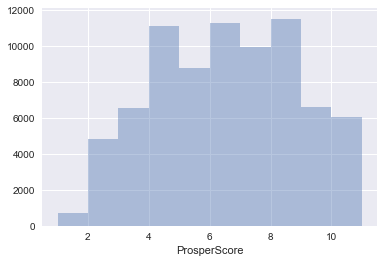

In [283]:
%matplotlib inline

sns.distplot(ldf.loc[:, 'ProsperScore'], bins=10, kde=False)

Looks like a negatively skewed distribution. A score of 1-3 was quite infrequent, which makes sense since they would be less inclined to issue a loan to someone with the poorest risk score.

Let's look at how the scores look for the members that defaulted versus those that completed their loan to start answering our main question.

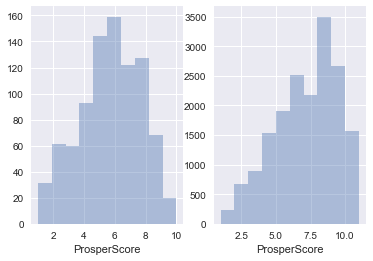

In [284]:
ldf_defaulted = ldf[ldf['LoanStatus'] == 'Defaulted']
ldf_completed = ldf[ldf['LoanStatus'] == 'Completed']

fig, ax = plt.subplots(1, 2)
sns.distplot(ldf_defaulted.loc[:, 'ProsperScore'], ax=ax[0], bins=10, kde=False)
sns.distplot(ldf_completed.loc[:, 'ProsperScore'], ax=ax[1], bins=10, kde=False)

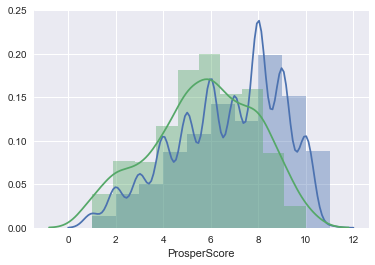

In [285]:
ldf_deforcomp = ldf_compdef.groupby('LoanStatus')['ProsperScore']
for status, group in ldf_deforcomp:
    g_chart = sns.distplot(group, label=status, bins=10)

There is definitely a skew towards the better prosper scores for the completed loans. There are fewer 1-4 scores, many more 9+10 scores, and the middle scores move towards the higher end.

In [286]:
ldf_grouped = ldf_compdef.groupby(['ProsperScore', 'LoanStatus'])
ldf_grouped.size()

ProsperScore  LoanStatus
1.0           Completed      238
              Defaulted       31
2.0           Completed      681
              Defaulted       61
3.0           Completed      896
              Defaulted       60
4.0           Completed     1538
              Defaulted       93
5.0           Completed     1913
              Defaulted      144
6.0           Completed     2521
              Defaulted      159
7.0           Completed     2176
              Defaulted      122
8.0           Completed     3501
              Defaulted      127
9.0           Completed     2672
              Defaulted       68
10.0          Completed     1536
              Defaulted       20
11.0          Completed       30
dtype: int64

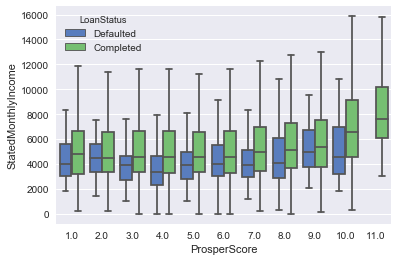

In [287]:
sns.boxplot(data=ldf_compdef, x="ProsperScore", y="StatedMonthlyIncome", hue="LoanStatus", palette='muted', showfliers=False)

There is definitely a trend here with higher prosper scores having higher completed rates, but the effect isn't clean enough to be particularly interesting. Let's instead see how APR plays into the equation.

(0, 100000)

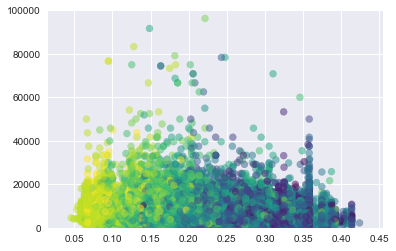

In [288]:
plt.scatter(ldf.BorrowerAPR, ldf.StatedMonthlyIncome, c=ldf.ProsperScore, cmap='viridis', alpha=0.5)
plt.ylim(0, 100000)

That's pretty neat, there's clearly a pattern here. The lower APR's are the ones that have the highest prosper score, and the trend is quite clean, you can even see the gradual transition from low apr/high prosper score and high apr, high prosper throughout the range. However, there are a tremendous amount of data points and it is difficult to see the pattern well. Let's try pivoting and aggregating the data.

IncomeRange,"$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"
ProsperScore,,,,,
1.0,0.342813,0.343241,0.336565,0.338544,0.339455
2.0,0.320189,0.310666,0.309138,0.305427,0.300778
3.0,0.305386,0.285537,0.282485,0.278471,0.273536
4.0,0.288987,0.262116,0.255456,0.252874,0.248881
5.0,0.301089,0.271789,0.254533,0.252653,0.246952
6.0,0.268737,0.248799,0.231801,0.228301,0.223585
7.0,0.244833,0.228249,0.209062,0.208011,0.206723
8.0,0.194733,0.188151,0.176709,0.176064,0.170423
9.0,0.150563,0.153905,0.148544,0.147314,0.146792


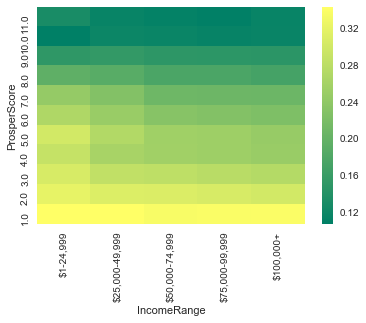

In [304]:
ldf_apr = pd.pivot_table(ldf, index='ProsperScore', columns='IncomeRange', values='BorrowerAPR')
ldf_apr = ldf_apr[['$1-24,999', '$25,000-49,999',
                     '$50,000-74,999', '$75,000-99,999','$100,000+']]
ax = sns.heatmap(ldf_apr, cmap="summer")
ax.invert_yaxis()
ldf_apr

This heatmap paints the clearest picture yet. It is abundantly clear that the higher prospect scores get a lower APR. There is a trend of lower APR for higher stated income range as well, but the effect isn't nearly as large as the prospect score, which makes sense since the prospect score is likely to be their aggregate of overall risk taking into account other factors.

The link between prosper score and income range is extremely intersting to me. If prospect score is effectively this loan companies definition of risk and reliability of a person, and income range plays into the chances of payback, I wonder how well these factors can paint a picture with respect to the other fields indicating recipient "financial health".

IncomeRange,"$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"
ProsperScore,,,,,
1.0,4411.089286,8027.418803,12648.013158,17055.682692,38980.828283
2.0,7510.821990,10059.238928,14952.826657,19617.181948,42423.971698
3.0,7184.394477,10519.220446,14491.397528,20447.525926,35542.030075
4.0,6406.085333,9995.117769,15094.776781,21488.865663,35957.426022
5.0,7122.477612,10320.865811,16544.017112,21503.238165,35585.389787
6.0,5747.567398,9070.229690,14595.883311,21208.071962,34430.900356
7.0,5580.486842,8431.612442,14777.352125,21605.520021,36545.805618
8.0,5785.766304,8614.533843,13874.615258,20357.071333,37221.245786
9.0,5040.816327,8351.927299,14368.201613,19428.696882,34334.762712


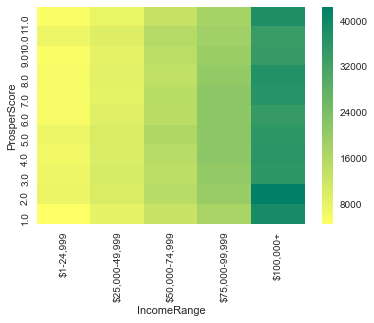

In [306]:
ldf_balance = pd.pivot_table(ldf, index='ProsperScore', columns='IncomeRange', values='RevolvingCreditBalance')
ldf_balance = ldf_balance[['$1-24,999', '$25,000-49,999',
                        '$50,000-74,999', '$75,000-99,999','$100,000+']]
ax = sns.heatmap(ldf_balance, cmap="summer_r")
ax.invert_yaxis()
ldf_balance

Interesting! The relationship here is reversed. Higher incomes clearly produce higher revolving debt, but the prospect score isn't very much affected by revolving debt, if at all. It seems people giving out loans don't believe a higher level of revolving debt is an indicator of increased risk, at ANY income level.

IncomeRange,"$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"
ProsperScore,,,,,
1.0,1.054107,0.436154,0.360746,0.318750,0.320707
2.0,0.714791,0.325878,0.272294,0.235702,0.212755
3.0,0.768994,0.325515,0.281339,0.245460,0.210175
4.0,0.554133,0.313035,0.276471,0.244412,0.207413
5.0,0.645877,0.306727,0.269362,0.233372,0.199523
6.0,0.600549,0.281555,0.254114,0.227116,0.191210
7.0,0.463579,0.257709,0.238550,0.217076,0.183360
8.0,0.379701,0.237638,0.222614,0.197766,0.174022
9.0,0.275850,0.220128,0.203246,0.182422,0.163741


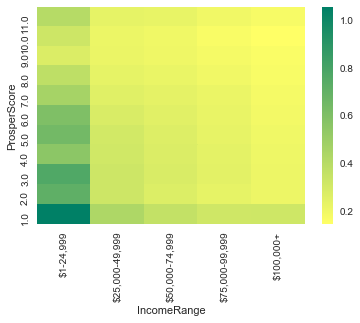

In [309]:
ldf_ratio = pd.pivot_table(ldf, index='ProsperScore', columns='IncomeRange', values='DebtToIncomeRatio')
ldf_ratio = ldf_ratio[['$1-24,999', '$25,000-49,999',
                        '$50,000-74,999', '$75,000-99,999','$100,000+']]
ax = sns.heatmap(ldf_ratio, cmap="summer_r")
ax.invert_yaxis()
ldf_ratio

Here, it seems that there is a link between debt to income ratio and prosper score. It seems the lowest prosper scores have the worst debt to income ratio, but the pattern is most clearly noticable at the lowest income range. This likely indicates that a high debt to income ratio is only seen as very risky when income is low. At all the other income ranges, risk is relatively unaffected by debt to income ratio.

IncomeRange,"$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"
ProsperScore,,,,,
1.0,8.321429,7.944444,7.302632,7.423077,4.666667
2.0,4.683246,5.022417,5.550619,6.773639,3.545283
3.0,4.544379,4.670593,4.994851,4.839153,5.066416
4.0,3.434667,4.069990,4.735090,4.918356,4.413383
5.0,3.039179,3.820735,4.484135,4.558631,4.220426
6.0,3.103448,4.102279,3.770149,4.399254,3.858244
7.0,2.997368,4.094281,4.179982,3.647524,3.164607
8.0,2.119565,3.179039,3.300468,3.283995,2.564485
9.0,2.360544,2.403421,2.518649,2.629442,1.850964


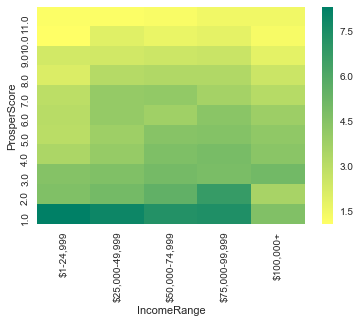

In [312]:
ldf_delinq = pd.pivot_table(ldf, index='ProsperScore', columns='IncomeRange', values='DelinquenciesLast7Years')
ldf_delinq = ldf_delinq[['$1-24,999', '$25,000-49,999',
                        '$50,000-74,999', '$75,000-99,999','$100,000+']]
ax = sns.heatmap(ldf_delinq, cmap="summer_r")
ax.invert_yaxis()
ldf_delinq

Here we can see the strongest indicator of risk to a loan company, the amount of delinquincies in the last 7 years. It's quite apparent at all income levels that the highest rates of delinquency have the worst risk score, and a low delinquency score will get you a better risk score no matter what your income range.